In [1]:
pip install numpy opencv-python easyocr matplotlib

  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: D:\IPCV Projects\IM3\Scripts\python.exe -m pip install --upgrade pip


In [2]:
import cv2
import easyocr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [3]:
img = mpimg.imread(r'D:\IPCV Projects\IM3\plate2.jpeg')

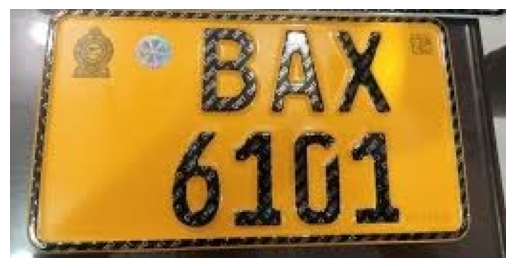

In [4]:
# display loaded image
%matplotlib inline
plt.imshow(img)
plt.axis("off")
plt.show()


Using CPU. Note: This module is much faster with a GPU.


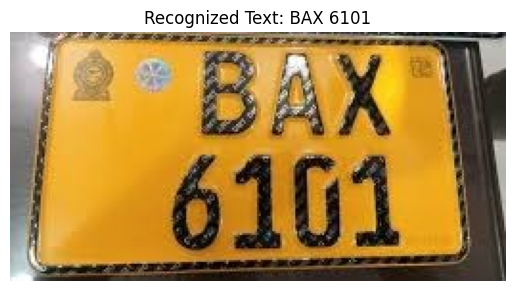

In [9]:
def preprocess_img(img_path):
    # load the image from the disk
    img = cv2.imread(img_path)
    # convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # apply Gaussian blur to reduce noise and improve OCR accuracy
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def perform_ocr(img, reader):
    # perform OCR on the preprocessed image
    result = reader.readtext(img)
    # extract and return the recognized text
    recognized_text = ' '.join([entry[1] for entry in result])
    return recognized_text

def display_image_with_results(img, text):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Recognized Text: {text}")
    plt.axis("off")
    plt.show()

def number_plate_recognition(img_path):
    # preprocess the image
    preprocessed_img = preprocess_img(img_path)
    # create an OCR reader using the 'en' language (for English text)
    reader = easyocr.Reader(['en'], gpu=False) # Use GPU if available, otherwise set gpu=False
    # perform OCR on the preprocessed image
    recognized_text = perform_ocr(preprocessed_img, reader)
    # display the results
    display_image_with_results(cv2.imread(img_path), recognized_text)

# Correct definition of img_path
img_path = r'D:\IPCV Projects\IM3\plate2.jpeg'
number_plate_recognition(img_path)
